In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import date
import datetime
from matplotlib.dates import MonthLocator, DateFormatter
import matplotlib.dates as mdates
from datetime import timedelta
import matplotlib.pylab as pylab

In [60]:
font = {'family' : 'times new roman',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

In [63]:
cpdf = pd.read_csv("CP_Scores-2902.csv")

In [64]:
cpdf.head()

,Main date,Distance,Gaussian Score,MeterID
0,2019-12-01,0.000000,0.000000,KOL-22812974
1,2019-12-02,1.905000,0.103570,KOL-22812974
2,2019-12-03,1.535250,0.000000,KOL-22812974
3,2019-12-04,1.752167,0.027129,KOL-22812974
4,2019-12-05,1.316875,0.000000,KOL-22812974


In [4]:
mdf = cpdf[cpdf['MeterID'] == 'KOL-22821266']
#mdf.sort_values("MeterID", inplace = True)
mdf.drop_duplicates("Main date", keep='first', inplace = True)
#mdf['Main date'] = pd.to_datetime(mdf['Main date'])
#mdf['Main date'] = mdf['Main date'].dt.strftime('%Y-%m-%d')

C:\Users\user\AppData\Local\Temp\ipykernel_7920\3371528132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf.drop_duplicates("Main date", keep='first', inplace = True)


In [52]:
mdf.to_csv("Ploting data/KOL-22821266-Scores.csv", index=False)

In [3]:
cpdf1 = pd.read_csv("Ploting data/KOL-22821266-Scores.csv")

In [4]:
x_1 = cpdf1['Main date']
y_1 = cpdf1['Gaussian Score']

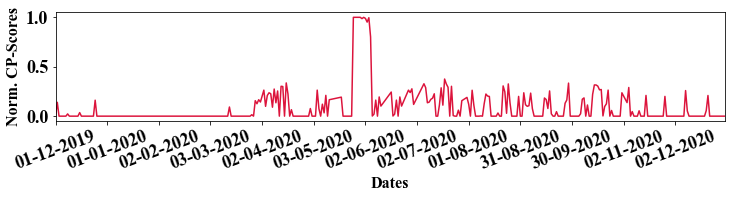

In [6]:
fig, ax2 = plt.subplots(figsize=(12,2)) #previously it was (15, 3)
ax2.plot(x_1,y_1, color="crimson")
ax2.set_xticks(x_1[::30])
ax2.set_xticklabels(x_1[::30], rotation=20) # previously it was 15
plt.xlabel('Dates', fontsize=16)
plt.ylabel('Norm. CP-Scores', fontsize=16)
#ax2.set_title("Change-Point (CP) Score profile (Gaussian scaling)", fontweight='bold')
plt.margins(x=0)
plt.savefig("Revision_plot/CP-Score_Profile-Gaussian_plot_revision.pdf", dpi=300, bbox_inches='tight')
#plt.show()

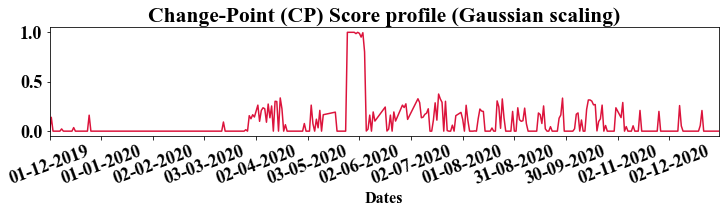

In [20]:
fig, ax2 = plt.subplots(figsize=(12,2)) #previously it was (15, 3)
ax2.plot(x_1,y_1, color="crimson")
ax2.set_xticks(x_1[::30])
ax2.set_xticklabels(x_1[::30], rotation=20) # previously it was 15
plt.xlabel('Dates', fontsize=16)
plt.ylabel('Normalized CP-Scores', fontsize=16)
#ax2.set_title("Change-Point (CP) Score profile (Gaussian scaling)", fontweight='bold')
plt.margins(x=0)
plt.savefig("Revision_plot/CP-Score_Profile-Gaussian_plot_revision.pdf", dpi=300, bbox_inches='tight')
#plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_13564\2819828070.py:12: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


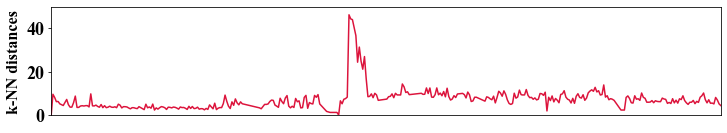

In [37]:
x = cpdf1['Main date']
y = cpdf1['Distance']
fig, ax2 = plt.subplots(figsize=(12,2))
ax2.plot(x,y, color="crimson")
ax2.set_ylim([0, 50])
ax2.set_xticks(x[::30])
ax2.set_xticklabels(x[::30], rotation=20)
#plt.xlabel('Dates', fontsize=16)
plt.ylabel('k-NN distances', fontsize=16)
#ax2.set_title("Change-Point (CP) Score profile (k-NN Distance)", fontweight='bold')
plt.margins(x=0)
plt.xticks([]) #to hide x axis ticks
plt.savefig("Revision_plot/CP-Score_Profile-Distance_plot_revision1.pdf", dpi=300, bbox_inches='tight')
plt.show()

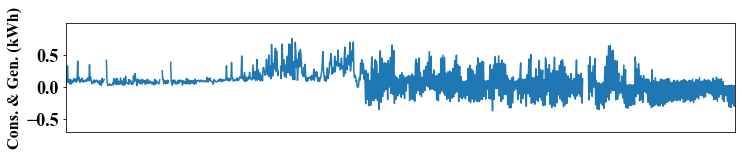

In [56]:
# Ploting with original consumption and solar generation
censoreddf = pd.read_csv("Ploting data/KOL-22821266.csv", dayfirst=True)
censoreddf = censoreddf.drop(['device_id'], axis = 1)
#censoreddf = censoreddf.drop(['date-month'], axis = 1)
df1 = pd.melt(censoreddf, 
            id_vars='dates', 
            value_vars=list(censoreddf.columns[1:]),
            var_name='time', 
            value_name='kwh')
df1["dates"] = pd.to_datetime(df1["dates"], dayfirst=True)
df1["time"] = pd.to_timedelta(df1["time"])
df1["datetime"] = df1["dates"] + df1["time"]
df1 = df1.drop(['dates','time'], axis = 1)
df1 = df1.set_index('datetime').resample('480min').mean()
df1 = df1.reset_index()
x1 = df1['datetime']
y1 = df1['kwh']
fig, ax2 = plt.subplots(figsize=(12,2))
ax2.plot(x1,y1)
ax2.set_xlim([datetime.date(2019, 12, 1), datetime.date(2020, 12, 31)])
ax2.set_ylim([-0.7, 0.99])
ax2.set_xticks(x1[::95].dt.date)
ax2.set_xticklabels(x1[::95].dt.date, rotation=20)
#plt.xlabel('Dates', fontsize=16)
plt.ylabel('Cons. & Gen. (kWh)', fontsize=16)
#ax2.set_title("Electricity consumption and generation (kWh)", fontweight='bold')
plt.margins(x=0)
plt.xticks([])
plt.savefig("Revision_plot/Electricity consumption_generation_plot_revision1.pdf", dpi=300, bbox_inches='tight')
plt.show()

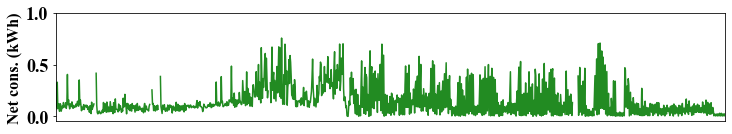

In [40]:
# Ploting with original consumption and extra solar generation as zero
censored_zerodf = pd.read_csv("Ploting data/KOL-22821266.csv", dayfirst=True)
censored_zerodf = censored_zerodf.drop(['device_id'], axis = 1)
df2 = pd.melt(censored_zerodf, 
            id_vars='dates', 
            value_vars=list(censored_zerodf.columns[1:]),
            var_name='time', 
            value_name='kwh')
df2["dates"] = pd.to_datetime(df2["dates"], dayfirst=True)
df2["time"] = pd.to_timedelta(df2["time"])
df2["datetime"] = df2["dates"] + df2["time"]
df2 = df2.drop(['dates','time'], axis = 1)
num = df2._get_numeric_data()
num[num < 0] = 0
df2 = df2.set_index('datetime').resample('480min').mean()
df2 = df2.reset_index()
x2 = df2['datetime']
y2 = df2['kwh']
fig, ax2 = plt.subplots(figsize=(12,2))
ax2.plot(x2,y2, color="forestgreen")
ax2.set_xlim([datetime.date(2019, 12, 1), datetime.date(2020, 12, 31)])
ax2.set_ylim([-0.05, 1])
ax2.set_xticks(x2[::95].dt.date)
ax2.set_xticklabels(x2[::95].dt.date, rotation=20)
#plt.xlabel('Dates', fontsize=16)
plt.ylabel('Net cons. (kWh)', fontsize=16)
plt.xticks([])
#ax2.set_title("Censored net electricity consumption (kWh)", fontweight='bold')
plt.savefig("Revision_plot/Censored net electricity_consumption_plot_revision1.pdf", dpi=300, bbox_inches='tight')
plt.show()

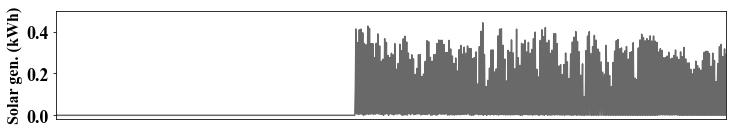

In [41]:
# Plotting only solar generation
solardf = pd.read_excel("Ploting data/Solar-1kw - 26-05.xlsx")
df3 = pd.melt(solardf, 
            id_vars='date', 
            value_vars=list(solardf.columns[1:]),
            var_name='time', 
            value_name='kwh')
df3["date"] = pd.to_datetime(df3["date"], dayfirst=True)
df3["time"] = pd.to_timedelta(df3["time"])
df3["datetime"] = df3["date"] + df3["time"]
df3 = df3.drop(['date','time'], axis = 1)
df3 = df3.set_index('datetime').resample('480min').mean()
df3 = df3.reset_index()
x3 = df3['datetime']
y3 = df3['kwh']
fig, ax2 = plt.subplots(figsize=(12,2))
ax2.plot(x3,y3, color="dimgray")
ax2.set_xlim([datetime.date(2019, 12, 1), datetime.date(2020, 12, 31)])
ax2.set_ylim([-0.02, 0.5])
ax2.set_xticks(x3[::95].dt.date)
ax2.set_xticklabels(x3[::95].dt.date, rotation=20)
#plt.xlabel('Dates', fontsize=16)
plt.ylabel('Solar gen. (kWh)', fontsize=16)
plt.xticks([])
#ax2.set_title("Solar PV generation (kWh)", fontweight='bold')
plt.savefig("Revision_plot/Solar PV_generation_plot_revision.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [16]:
edf = pd.read_csv("Data/KOL_15mins_final_data-11839.csv")

In [17]:
edf.head()

,device_id,dates,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
0,KOL-22812953,2019-12-01,0.016,0.015,0.040,0.042,0.030,0.009,0.010,0.009,...,0.016,0.015,0.016,0.016,0.016,0.016,0.018,0.019,0.028,0.021
1,KOL-22812953,2019-12-02,0.020,0.019,0.017,0.009,0.009,0.010,0.009,0.010,...,0.016,0.015,0.017,0.016,0.015,0.015,0.016,0.015,0.015,0.016
2,KOL-22812953,2019-12-03,0.016,0.021,0.015,0.017,0.016,0.016,0.016,0.009,...,0.016,0.035,0.026,0.015,0.016,0.015,0.016,0.015,0.015,0.015
3,KOL-22812953,2019-12-04,0.017,0.024,0.015,0.018,0.019,0.009,0.010,0.009,...,0.011,0.011,0.012,0.015,0.016,0.020,0.015,0.037,0.041,0.023
4,KOL-22812953,2019-12-05,0.015,0.022,0.016,0.015,0.018,0.011,0.011,0.012,...,0.016,0.016,0.016,0.015,0.016,0.020,0.015,0.015,0.016,0.015


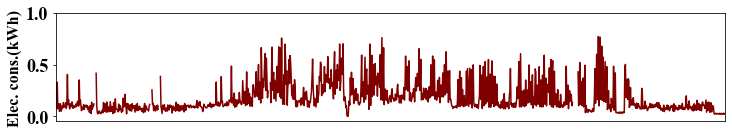

In [44]:
# Plotting only original energy consumption
edf1 = edf[edf['device_id'] == 'KOL-22821266']
edf1 = edf1.drop(['device_id'], axis = 1)
df4 = pd.melt(edf1, id_vars='dates', 
              value_vars=list(edf1.columns[1:]), 
              var_name='time', 
              value_name='kwh')
df4["dates"] = pd.to_datetime(df4["dates"], dayfirst=True)
df4["time"] = pd.to_timedelta(df4["time"])
df4["datetime"] = df4["dates"] + df4["time"]
df4 = df4.drop(['dates','time'], axis = 1)
df4 = df4.set_index('datetime').resample('480min').mean()
df4 = df4.reset_index()
x4 = df4['datetime']
y4 = df4['kwh']
fig, ax2 = plt.subplots(figsize=(12,2))
ax2.plot(x4,y4, color="maroon")
ax2.set_xlim([datetime.date(2019, 12, 1), datetime.date(2020, 12, 31)])
ax2.set_ylim([-0.05, 1])
ax2.set_xticks(x4[::100].dt.date)
ax2.set_xticklabels(x4[::100].dt.date, rotation=20)
#plt.xlabel('Dates', fontsize=16)
plt.ylabel('Elec. cons.(kWh)', fontsize=16)
plt.xticks([])
#ax2.set_title("Electricity consumption measurements from smart meter (kWh)", fontweight='bold')
plt.savefig("Revision_plot/Electricity_consumption_plot_revision1.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [756]:
cpdf.head()

,Gaussian Score,MeterID
Main date,,
2019-12-01,0.000000,KOL-22812974
2019-12-02,0.103570,KOL-22812974
2019-12-03,0.000000,KOL-22812974
2019-12-04,0.027129,KOL-22812974
2019-12-05,0.000000,KOL-22812974


In [795]:
cpdf['date1']=pd.to_datetime(cpdf['Main date'])
cpdf['date1']=cpdf['date1'].dt.strftime('%Y-%m-%d')

In [766]:
cpdf.head()

,Main date,Gaussian Score,MeterID,date1
0,2019-12-01,0.000000,KOL-22812974,2019-12-01
1,2019-12-02,0.103570,KOL-22812974,2019-12-02
2,2019-12-03,0.000000,KOL-22812974,2019-12-03
3,2019-12-04,0.027129,KOL-22812974,2019-12-04
4,2019-12-05,0.000000,KOL-22812974,2019-12-05


In [801]:
cpdf_pivot=cpdf.pivot_table(index='MeterID', columns='Main date', values='Gaussian Score')

In [802]:
cpdf_pivot

Main date,2019-12-01,2019-12-02,2019-12-03,2019-12-04,2019-12-05,2019-12-06,2019-12-07,2019-12-08,2019-12-09,2019-12-10,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
MeterID,,,,,,,,,,,,,,,,,,,,,
KOL-22812974,0.0,0.10357,0.000000,0.027129,0.000000,0.169097,0.000000,0.000000,0.000000,0.000000,...,0.012501,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.131520,NaN,NaN
KOL-22812979,0.0,0.03499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.221762
KOL-22812980,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.068791,0.000000,0.185671,0.000000,0.000000,0.000000,0.000000,0.000000,0.242699
KOL-22812998,0.0,0.00000,0.086956,0.368842,0.008652,0.065315,0.498131,0.279248,0.141474,0.009242,...,0.447694,0.540731,0.029817,0.833896,0.379007,0.509494,0.225640,0.322887,0.231261,0.442956
KOL-22813000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066928,0.000000,0.000000,...,0.154194,0.457859,0.496562,0.479011,0.411571,0.539103,0.532516,0.426024,0.239177,0.201688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KOL-23257519,NaN,NaN,NaN,NaN,NaN,0.000000,0.697514,0.618471,0.135672,0.000000,...,0.000000,0.000000,0.067261,0.000000,0.000000,0.000000,0.255987,0.000000,0.000000,0.000000
KOL-23257520,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.400177,0.939627,0.981956,...,0.634309,0.369514,0.276946,0.282068,0.315702,0.376687,0.619608,0.647216,0.419176,0.384154
KOL-23257523,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.239618,0.000000,0.000000,0.000000


In [803]:
cpdf_pivot.to_csv("CP_Scores-2902_pivoted-F.csv")

In [681]:
cpdf.nunique()

Unnamed: 0           393
Main date            788
Distance          907752
Gaussian Score    442740
MeterID             2903
dtype: int64

In [20]:
#Ploting for normal meters
nmdf = pd.read_csv("CP_Scores_Distance-630.csv")

In [21]:
nmdf.head()

,MeterID,01-12-2019,02-12-2019,03-12-2019,04-12-2019,05-12-2019,06-12-2019,07-12-2019,08-12-2019,09-12-2019,...,24-12-2020,25-12-2020,26-12-2020,27-12-2020,28-12-2020,29-12-2020,30-12-2020,31-12-2020,Min,Max
0,KOL-22814861,0,0.9850,3.99225,1.380667,1.084750,1.8541,1.186917,1.322786,1.048437,...,0.738111,0.793000,63.842000,121.768722,104.159611,90.657611,77.678944,64.728722,0,121.768722
1,KOL-22815155,0,0.0575,0.03500,0.029500,0.032875,0.2666,1.478000,1.194000,1.014375,...,0.075333,0.005667,0.005667,0.018556,0.020778,0.060778,0.070444,0.140889,0,49.741333
2,KOL-22814862,0,0.3190,0.22000,0.473667,0.271500,0.2345,0.420250,0.234929,0.213688,...,0.042222,0.038667,11.322778,38.620222,44.186444,36.116000,33.440444,34.531778,0,44.186444
3,KOL-22814896,0,0.7600,1.58875,1.431667,1.260500,1.0380,0.986083,1.261929,1.169750,...,0.737333,1.134000,0.796111,1.030944,0.693000,0.689167,0.612778,0.677667,0,43.800722
4,KOL-22814761,0,0.7600,1.58875,1.431667,1.260500,1.0380,0.986083,1.261929,1.169750,...,0.347333,0.363222,0.308889,0.419778,0.333000,0.328333,0.319889,0.354444,0,34.277167


C:\Users\user\AppData\Local\Temp\ipykernel_13564\2755342262.py:18: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


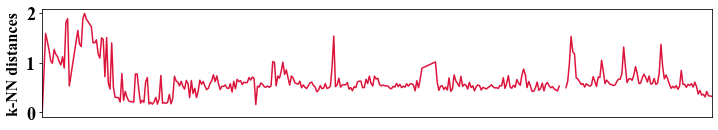

In [22]:
ndf = nmdf[nmdf['MeterID'] == 'KOL-22814761']
ndf = pd.melt(ndf, id_vars='MeterID', 
              value_vars=list(ndf.columns[1:397]), 
              var_name='Main date', 
              value_name='distance')
ndf['Main date'] = ndf['Main date'].str[:10]
#ndf["Main date"] = pd.to_datetime(ndf["Main date"], dayfirst=True)
v1 = ndf['Main date']
v2 = ndf['distance']
fig, ax2 = plt.subplots(figsize=(12,2))
ax2.plot(v1,v2, color="crimson")
#ax2.set_xlim([datetime.date(2019, 12, 1), datetime.date(2020, 12, 31)])
ax2.set_xticks(v1[::30])
ax2.set_xticklabels(v1[::30], rotation=20)
plt.xlabel('Dates', fontsize=16)
plt.ylabel('k-NN distances', fontsize=16)
#ax2.set_title("Change-Point (CP) Score profile (k-NN Distance)", fontweight='bold')
plt.margins(x=0)
plt.savefig("Revision_plot/CP-Score_Profile-Distance_plot-normal_revision1.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [106]:
edf1 = edf[edf['device_id'] == 'KOL-22814761']
edf1.to_csv("Ploting data/KOL-22814761-normal.csv", index=False)

In [47]:
edf1 = pd.read_csv("Ploting data/KOL-22814761-normal.csv")

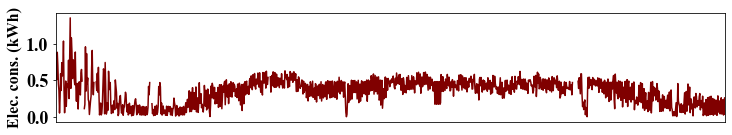

In [48]:
# Plotting only original energy consumption
#edf1 = edf[edf['device_id'] == 'KOL-22814761']
edf1 = edf1.drop(['device_id'], axis = 1)
df4 = pd.melt(edf1, id_vars='dates', 
              value_vars=list(edf1.columns[1:]), 
              var_name='time', 
              value_name='kwh')
df4["dates"] = pd.to_datetime(df4["dates"], dayfirst=True)
df4["time"] = pd.to_timedelta(df4["time"])
df4["datetime"] = df4["dates"] + df4["time"]
df4 = df4.drop(['dates','time'], axis = 1)
df4 = df4.set_index('datetime').resample('480min').mean()
df4 = df4.reset_index()
x4 = df4['datetime']
y4 = df4['kwh']*9
fig, ax2 = plt.subplots(figsize=(12,2))
ax2.plot(x4,y4, color="maroon")
ax2.set_xlim([datetime.date(2019, 12, 1), datetime.date(2020, 12, 31)])
#ax2.set_ylim([-0.05, 1.2])
ax2.set_xticks(x4[::100].dt.date)
ax2.set_xticklabels(x4[::100].dt.date, rotation=20)
#plt.xlabel('Dates', fontsize=16)
plt.ylabel('Elec. cons. (kWh)', fontsize=16)
plt.xticks([])
#ax2.set_title("Electricity consumption measurements from smart meter (kWh)", fontweight='bold')
plt.savefig("Revision_plot/Electricity_consumption_plot-normal_revision1.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [216]:
rdf = pd.read_csv("D:/Kol-data_1219-1220_11839_meters_R.csv")

In [217]:
rdf.head()

,device_id,dates,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
0,KOL-22812953,2019-12-01,0.016,0.015,0.040,0.042,0.030,0.009,0.010,0.009,...,0.016,0.015,0.016,0.016,0.016,0.016,0.018,0.019,0.028,0.021
1,KOL-22812953,2019-12-02,0.020,0.019,0.017,0.009,0.009,0.010,0.009,0.010,...,0.016,0.015,0.017,0.016,0.015,0.015,0.016,0.015,0.015,0.016
2,KOL-22812953,2019-12-03,0.016,0.021,0.015,0.017,0.016,0.016,0.016,0.009,...,0.016,0.035,0.026,0.015,0.016,0.015,0.016,0.015,0.015,0.015
3,KOL-22812953,2019-12-04,0.017,0.024,0.015,0.018,0.019,0.009,0.010,0.009,...,0.011,0.011,0.012,0.015,0.016,0.020,0.015,0.037,0.041,0.023
4,KOL-22812953,2019-12-05,0.015,0.022,0.016,0.015,0.018,0.011,0.011,0.012,...,0.016,0.016,0.016,0.015,0.016,0.020,0.015,0.015,0.016,0.015


In [218]:
import re

In [219]:
rdf['idmeter'] = rdf['device_id'].str.replace(r'\D', '').astype(int)

In [220]:
rdf.tail()

,device_id,dates,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,...,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00,idmeter
4606998,KOL-23257553,2020-12-27,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,...,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,23257553
4606999,KOL-23257553,2020-12-28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.04,0.05,23257553
4607000,KOL-23257553,2020-12-29,0.05,0.05,0.05,0.05,0.05,0.05,0.15,0.05,...,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.11,23257553
4607001,KOL-23257553,2020-12-30,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,23257553
4607002,KOL-23257553,2020-12-31,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23257553


In [221]:
rdf['dates'] = pd.to_datetime(rdf.dates)
rdf['dates'] = rdf['dates'].dt.strftime('%d-%m-%Y')

In [222]:
rdf.tail()

,device_id,dates,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,...,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00,idmeter
4606998,KOL-23257553,27-12-2020,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,...,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,23257553
4606999,KOL-23257553,28-12-2020,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.04,0.05,23257553
4607000,KOL-23257553,29-12-2020,0.05,0.05,0.05,0.05,0.05,0.05,0.15,0.05,...,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.11,23257553
4607001,KOL-23257553,30-12-2020,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,23257553
4607002,KOL-23257553,31-12-2020,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23257553


In [223]:
rdf = rdf.drop(['device_id'], axis = 1)

In [226]:
rdf.head()

,dates,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,...,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00,idmeter
0,01-12-2019,0.016,0.015,0.040,0.042,0.030,0.009,0.010,0.009,0.009,...,0.015,0.016,0.016,0.016,0.016,0.018,0.019,0.028,0.021,22812953
1,02-12-2019,0.020,0.019,0.017,0.009,0.009,0.010,0.009,0.010,0.010,...,0.015,0.017,0.016,0.015,0.015,0.016,0.015,0.015,0.016,22812953
2,03-12-2019,0.016,0.021,0.015,0.017,0.016,0.016,0.016,0.009,0.009,...,0.035,0.026,0.015,0.016,0.015,0.016,0.015,0.015,0.015,22812953
3,04-12-2019,0.017,0.024,0.015,0.018,0.019,0.009,0.010,0.009,0.010,...,0.011,0.012,0.015,0.016,0.020,0.015,0.037,0.041,0.023,22812953
4,05-12-2019,0.015,0.022,0.016,0.015,0.018,0.011,0.011,0.012,0.011,...,0.016,0.016,0.015,0.016,0.020,0.015,0.015,0.016,0.015,22812953


In [227]:
rdf1 = rdf.copy()

In [228]:
first_column = rdf1.pop('idmeter')
rdf1.insert(0, 'idmeter', first_column)

In [229]:
rdf1

,idmeter,dates,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
0,22812953,01-12-2019,0.016,0.015,0.040,0.042,0.030,0.009,0.010,0.009,...,0.016,0.015,0.016,0.016,0.016,0.016,0.018,0.019,0.028,0.021
1,22812953,02-12-2019,0.020,0.019,0.017,0.009,0.009,0.010,0.009,0.010,...,0.016,0.015,0.017,0.016,0.015,0.015,0.016,0.015,0.015,0.016
2,22812953,03-12-2019,0.016,0.021,0.015,0.017,0.016,0.016,0.016,0.009,...,0.016,0.035,0.026,0.015,0.016,0.015,0.016,0.015,0.015,0.015
3,22812953,04-12-2019,0.017,0.024,0.015,0.018,0.019,0.009,0.010,0.009,...,0.011,0.011,0.012,0.015,0.016,0.020,0.015,0.037,0.041,0.023
4,22812953,05-12-2019,0.015,0.022,0.016,0.015,0.018,0.011,0.011,0.012,...,0.016,0.016,0.016,0.015,0.016,0.020,0.015,0.015,0.016,0.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4606998,23257553,27-12-2020,0.000,0.000,0.010,0.000,0.000,0.000,0.000,0.000,...,0.000,0.010,0.000,0.000,0.000,0.010,0.010,0.000,0.000,0.000
4606999,23257553,28-12-2020,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.010,...,0.050,0.050,0.050,0.050,0.050,0.050,0.050,0.050,0.040,0.050
4607000,23257553,29-12-2020,0.050,0.050,0.050,0.050,0.050,0.050,0.150,0.050,...,0.010,0.000,0.000,0.000,0.000,0.010,0.010,0.000,0.000,0.110
4607001,23257553,30-12-2020,0.010,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.010,0.000,0.000,0.000,0.000,0.000,0.000


In [230]:
rdf1.to_csv("D:/Kol-data_1219-1220_11839_meters_R_numeric.csv", index=False)

In [25]:
#Generate plot for EV-4W and Temp change
evdf = pd.read_csv("CP_scores_EV-4W-60.csv")

In [26]:
evdf.head()

,MeterID,01-12-2019,02-12-2019,03-12-2019,04-12-2019,05-12-2019,06-12-2019,07-12-2019,08-12-2019,09-12-2019,...,22-12-2020,23-12-2020,24-12-2020,25-12-2020,26-12-2020,27-12-2020,28-12-2020,29-12-2020,30-12-2020,31-12-2020
0,KOL-22815001,0,0.0,0.114116,0.187997,0.074786,0.045629,0.246797,0.231440,0.121417,...,0.000000,0.098134,0.1212,0.258308,0.011435,0.080122,0.0,0.0,0.0,0.0
1,KOL-22815002,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,KOL-22815003,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,KOL-22815004,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.015133,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,KOL-22815005,0,0.0,0.100468,0.000000,0.000000,0.000000,0.000000,0.079525,0.006830,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


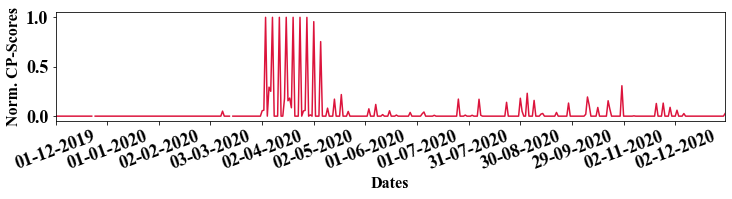

In [27]:
evdf1 = evdf[evdf['MeterID'] == 'KOL-22815059']
evdf1 = pd.melt(evdf1, id_vars='MeterID', 
              value_vars=list(evdf1.columns[1:]), 
              var_name='Main date', 
              value_name='Gaussian score')
evdf1['Main date'] = evdf1['Main date'].str[:10]
#ndf["Main date"] = pd.to_datetime(ndf["Main date"], dayfirst=True)
v1 = evdf1['Main date']
v2 = evdf1['Gaussian score']
fig, ax2 = plt.subplots(figsize=(12,2))
ax2.plot(v1,v2, color="crimson")
#ax2.set_xlim([datetime.date(2019, 12, 1), datetime.date(2020, 12, 31)])
ax2.set_xticks(v1[::30])
ax2.set_xticklabels(v1[::30], rotation=20)
plt.xlabel('Dates', fontsize=16)
plt.ylabel('Norm. CP-Scores', fontsize=16)
#ax2.set_title("Change-Point (CP) Score profile (Gaussian scaling)", fontweight='bold')
plt.margins(x=0)
plt.savefig("Revision_plot/CP-Score_Profile-Gaussian_plot-EV-4W_revision.pdf", dpi=300, bbox_inches='tight')
#plt.show()

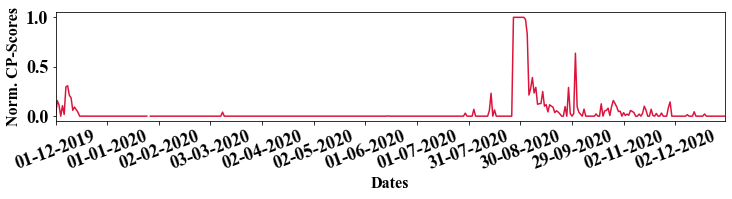

In [28]:
evdf1 = evdf[evdf['MeterID'] == 'KOL-22815012']
evdf1 = pd.melt(evdf1, id_vars='MeterID', 
              value_vars=list(evdf1.columns[1:]), 
              var_name='Main date', 
              value_name='Gaussian score')
evdf1['Main date'] = evdf1['Main date'].str[:10]
#ndf["Main date"] = pd.to_datetime(ndf["Main date"], dayfirst=True)
v1 = evdf1['Main date']
v2 = evdf1['Gaussian score']
fig, ax2 = plt.subplots(figsize=(12,2))
ax2.plot(v1,v2, color="crimson")
#ax2.set_xlim([datetime.date(2019, 12, 1), datetime.date(2020, 12, 31)])
ax2.set_xticks(v1[::30])
ax2.set_xticklabels(v1[::30], rotation=20)
plt.xlabel('Dates', fontsize=16)
plt.ylabel('Norm. CP-Scores', fontsize=16)
#ax2.set_title("Change-Point (CP) Score profile (Gaussian scaling)", fontweight='bold')
plt.margins(x=0)
plt.savefig("Revision_plot/CP-Score_Profile-Gaussian_plot-Temp_change_revision.pdf", dpi=300, bbox_inches='tight')
#plt.show()

In [203]:
edf1 = edf[edf['device_id'] == 'KOL-22815012']
edf1.to_csv("Ploting data/KOL-22815012-Temp.csv", index=False)

In [57]:
edf1 = pd.read_csv("Ploting data/KOL-22815012-Temp.csv")

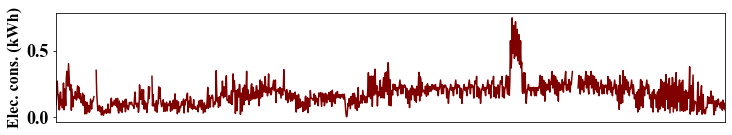

In [58]:
# Plotting only original energy consumption-Temp chnage
#edf1 = edf[edf['device_id'] == 'KOL-22815012']
#edf1 = edf1.drop(['device_id'], axis = 1)
df4 = pd.melt(edf1, id_vars='dates', 
              value_vars=list(edf1.columns[2:]), 
              var_name='time', 
              value_name='kwh')
df4["dates"] = pd.to_datetime(df4["dates"], dayfirst=True)
df4["time"] = pd.to_timedelta(df4["time"])
df4["datetime"] = df4["dates"] + df4["time"]
df4 = df4.drop(['dates','time'], axis = 1)
df4 = df4.set_index('datetime').resample('480min').mean()
df4 = df4.reset_index()
x4 = df4['datetime']
y4 = df4['kwh']*10
fig, ax2 = plt.subplots(figsize=(12,2))
ax2.plot(x4,y4, color="maroon")
ax2.set_xlim([datetime.date(2019, 12, 1), datetime.date(2020, 12, 31)])
#ax2.set_ylim([-0.05, 1])
ax2.set_xticks(x4[::100].dt.date)
ax2.set_xticklabels(x4[::100].dt.date, rotation=20)
#plt.xlabel('Dates', fontsize=16)
plt.ylabel('Elec. cons. (kWh)', fontsize=16)
plt.xticks([])
#ax2.set_title("Electricity consumption measurements from smart meter (kWh)", fontweight='bold')
plt.savefig("Revision_plot/Electricity_consumption_plot-Temp_change_revision1.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [32]:
evddf = pd.read_csv("CP_scores_Distance_EV-4W-60.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_13564\4095713730.py:18: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


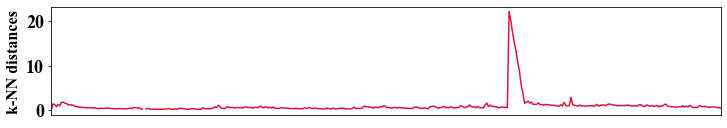

In [50]:
evdf1 = evddf[evddf['MeterID'] == 'KOL-22815012']
evdf1 = pd.melt(evdf1, id_vars='MeterID', 
              value_vars=list(evdf1.columns[1:]), 
              var_name='Main date', 
              value_name='Distance')
evdf1['Main date'] = evdf1['Main date'].str[:10]
#ndf["Main date"] = pd.to_datetime(ndf["Main date"], dayfirst=True)
v1 = evdf1['Main date']
v2 = evdf1['Distance']*1.5
fig, ax2 = plt.subplots(figsize=(12,2))
ax2.plot(v1,v2, color="crimson")
#ax2.set_xlim([datetime.date(2019, 12, 1), datetime.date(2020, 12, 31)])
ax2.set_xticks(v1[::30])
ax2.set_xticklabels(v1[::30], rotation=20)
#plt.xlabel('Dates', fontsize=16)
plt.ylabel('k-NN distances', fontsize=16)
#ax2.set_title("Change-Point (CP) Score profile (k-NN distance)", fontweight='bold')
plt.xticks([])
plt.margins(x=0)
plt.savefig("Revision_plot/CP-Score_Profile-Distance_plot-Temp_change_revision1.pdf", dpi=300, bbox_inches='tight')

C:\Users\user\AppData\Local\Temp\ipykernel_13564\3180181877.py:18: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


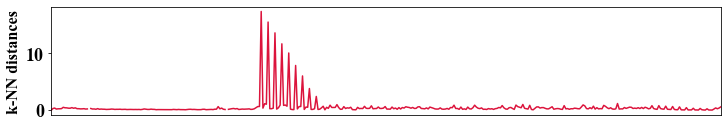

In [51]:
evdf1 = evddf[evddf['MeterID'] == 'KOL-22815059']
evdf1 = pd.melt(evdf1, id_vars='MeterID', 
              value_vars=list(evdf1.columns[1:]), 
              var_name='Main date', 
              value_name='Distance')
evdf1['Main date'] = evdf1['Main date'].str[:10]
#ndf["Main date"] = pd.to_datetime(ndf["Main date"], dayfirst=True)
v1 = evdf1['Main date']
v2 = evdf1['Distance']*1.5
fig, ax2 = plt.subplots(figsize=(12,2))
ax2.plot(v1,v2, color="crimson")
#ax2.set_xlim([datetime.date(2019, 12, 1), datetime.date(2020, 12, 31)])
ax2.set_xticks(v1[::30])
ax2.set_xticklabels(v1[::30], rotation=20)
#plt.xlabel('Dates', fontsize=16)
plt.ylabel('k-NN distances', fontsize=16)
#ax2.set_title("Change-Point (CP) Score profile (k-NN distance)", fontweight='bold')
plt.xticks([])
plt.margins(x=0)
plt.savefig("Revision_plot/CP-Score_Profile-Distance_plot-EV-4W_revision1.pdf", dpi=300, bbox_inches='tight')
plt.show()

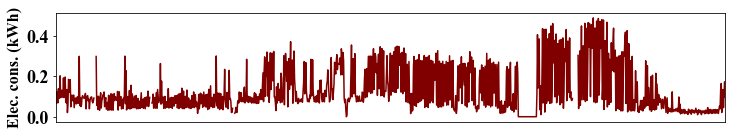

In [52]:
# Plotting only original energy consumption
edf1 = edf[edf['device_id'] == 'KOL-22815059']
edf1 = edf1.drop(['device_id'], axis = 1)
df4 = pd.melt(edf1, id_vars='dates', 
              value_vars=list(edf1.columns[1:]), 
              var_name='time', 
              value_name='kwh')
df4["dates"] = pd.to_datetime(df4["dates"], dayfirst=True)
df4["time"] = pd.to_timedelta(df4["time"])
df4["datetime"] = df4["dates"] + df4["time"]
df4 = df4.drop(['dates','time'], axis = 1)
df4 = df4.set_index('datetime').resample('480min').mean()
df4 = df4.reset_index()
x4 = df4['datetime']
y4 = df4['kwh']*16
fig, ax2 = plt.subplots(figsize=(12,2))
ax2.plot(x4,y4, color="maroon")
ax2.set_xlim([datetime.date(2019, 12, 1), datetime.date(2020, 12, 31)])
#ax2.set_ylim([-0.05, 1])
ax2.set_xticks(x4[::100].dt.date)
ax2.set_xticklabels(x4[::100].dt.date, rotation=20)
#plt.xlabel('Dates', fontsize=16)
plt.ylabel('Elec. cons. (kWh)', fontsize=16)
#ax2.set_title("Electricity consumption measurements from smart meter (kWh)", fontweight='bold')
plt.xticks([])
plt.savefig("Revision_plot/Electricity_consumption_plot-EV-4W_revision1.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [84]:
#Scenario 4
df_s4 = pd.read_csv("Gaussian Scores-PV_EV_k=9/PVEV4W_dailycharging_PVhoursonly/KOL-22815026.csv")
#df_s4 = pd.read_csv("Gaussian Scores-PV_EV_k=9/PVEV4W_EverySecondDay_PVhoursonly/KOL-22815026.csv")
#df_s4 = pd.read_csv("Gaussian Scores-PV_EV_k=9/PVEV4W_TwiceinaWeek_PVhoursonly/KOL-22815026.csv")

In [85]:
df_s4.head()

,MeterID,Main date,Distance,Gaussian Score
0,KOL-22815026,01-12-2019,0.000000,0.0
1,KOL-22815026,02-12-2019,1.695500,0.0
2,KOL-22815026,03-12-2019,6.389500,0.0
3,KOL-22815026,04-12-2019,2.548333,0.0
4,KOL-22815026,05-12-2019,2.726125,0.0


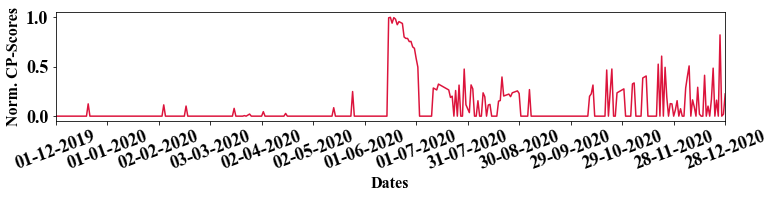

In [87]:
x_1 = df_s4['Main date']
y_1 = df_s4['Gaussian Score']
fig, ax2 = plt.subplots(figsize=(12,2)) #previously it was (15, 3)
ax2.plot(x_1,y_1, color="crimson")
ax2.set_xticks(x_1[::30])
ax2.set_xticklabels(x_1[::30], rotation=20) # previously it was 15
plt.xlabel('Dates', fontsize=16)
plt.ylabel('Norm. CP-Scores', fontsize=16)
#ax2.set_title("Change-Point (CP) Score profile (Gaussian scaling)", fontweight='bold')
plt.margins(x=0)
plt.savefig("Revision_plot/CP-Score_Profile-Gaussian_plot_PV+EV.pdf", dpi=300, bbox_inches='tight')
#plt.show()

In [88]:
df_s4_1 = pd.read_csv("Data_processed_PV_EV/PVEV4W_dailycharging_PVhoursonly/KOL-22815026.csv")

In [90]:
df_s4_1.head()

,dates,device_id,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
0,2019-12-01,KOL-22815026,0.0050,0.006,0.006,0.006,0.005,0.006,0.005,0.006,...,0.0165,0.012,0.0125,0.0095,0.0105,0.0115,0.0165,0.0125,0.012,0.0105
1,2019-12-02,KOL-22815026,0.0035,0.003,0.002,0.003,0.002,0.003,0.002,0.003,...,0.0050,0.006,0.0060,0.1700,0.1970,0.1980,0.1980,0.1970,0.164,0.1650
2,2019-12-03,KOL-22815026,0.1990,0.159,0.182,0.111,0.006,0.005,0.006,0.005,...,0.0360,0.043,0.0080,0.0070,0.0050,0.0060,0.0050,0.0060,0.003,0.0020
3,2019-12-04,KOL-22815026,0.0030,0.003,0.003,0.002,0.003,0.002,0.003,0.003,...,0.1990,0.201,0.1460,0.1440,0.0070,0.0070,0.0060,0.0030,0.003,0.0020
4,2019-12-05,KOL-22815026,0.0030,0.003,0.003,0.003,0.002,0.003,0.002,0.003,...,0.0060,0.007,0.0020,0.0030,0.0030,0.0020,0.0020,0.0020,0.003,0.0030


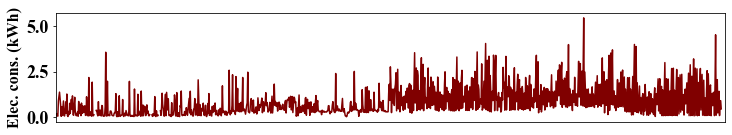

In [98]:
# Plotting only original energy consumption Scenario 4
edf1 = df_s4_1[df_s4_1['device_id'] == 'KOL-22815026']
edf1 = edf1.drop(['device_id'], axis = 1)
num = edf1._get_numeric_data()
num[num < 0] = 0
df4 = pd.melt(edf1, id_vars='dates', 
              value_vars=list(edf1.columns[1:]), 
              var_name='time', 
              value_name='kwh')
df4["dates"] = pd.to_datetime(df4["dates"], dayfirst=True)
df4["time"] = pd.to_timedelta(df4["time"])
df4["datetime"] = df4["dates"] + df4["time"]
df4 = df4.drop(['dates','time'], axis = 1)
df4 = df4.set_index('datetime').resample('480min').mean()
df4 = df4.reset_index()
x4 = df4['datetime']
y4 = df4['kwh']*16
fig, ax2 = plt.subplots(figsize=(12,2))
ax2.plot(x4,y4, color="maroon")
ax2.set_xlim([datetime.date(2019, 12, 1), datetime.date(2020, 12, 31)])
#ax2.set_ylim([-0.05, 1])
ax2.set_xticks(x4[::100].dt.date)
ax2.set_xticklabels(x4[::100].dt.date, rotation=20)
#plt.xlabel('Dates', fontsize=16)
plt.ylabel('Elec. cons. (kWh)', fontsize=16)
#ax2.set_title("Electricity consumption measurements from smart meter (kWh)", fontweight='bold')
plt.xticks([])
plt.savefig("Revision_plot/Electricity_consumption_plot-PV+EV.pdf", dpi=300, bbox_inches='tight')
plt.show()